#### **Set-up and Creating the Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [23]:
# creating the dataset
features, targets = make_classification(n_samples=20, n_features=2, n_clusters_per_class= 1, n_redundant=0, n_informative=1, random_state=1)



In [24]:
# Insert the data into dataframe 
df = pd.DataFrame(data=features, columns=['x1', 'x2'])

df['targets'] = targets

# Print the table
df

,x1,x2,targets
0,-0.887629,0.784959,1
1,-0.012665,1.141704,1
2,-0.191836,0.984424,1
3,-0.267888,-0.330421,0
4,-0.935769,-1.883225,0
5,0.234416,1.405825,1
6,0.530355,-1.292116,0
7,-0.122890,-0.667896,0
8,-0.845206,1.760128,1
9,1.659802,1.063621,1


In [5]:
# Check the shape of the features
features.shape

(20, 3)

In [6]:
# Check the shape of the target
targets.shape

(20,)

In [7]:
# Count the samples of each class 
np.bincount(targets)

array([10, 10])

#### **Plotting the two input features by the target class**

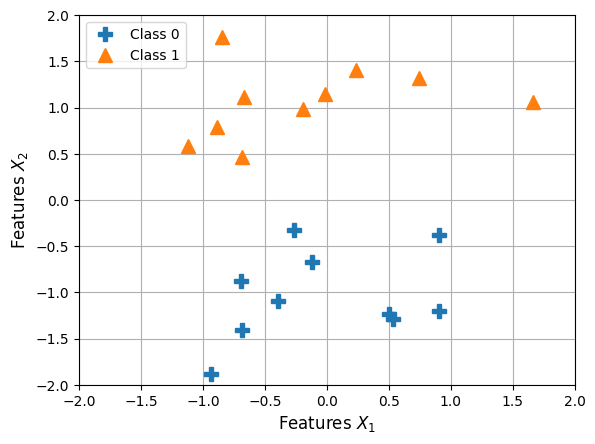

In [25]:
# Plot two input features by the target class
plt.plot(
    features[targets== 0, 0],
    features[targets == 0, 1],
    marker = 'P',
    markersize = 10,
    linestyle = '',
    label = 'Class 0'
    )
plt.plot(
    features[targets == 1,0],
    features[targets == 1,1],
    marker = '^',
    markersize = '10',
    linestyle = '',
    label = 'Class 1'
    )
plt.legend(loc = 2)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("Features $X_1$", fontsize = 12)
plt.ylabel("Features $X_2$", fontsize=12)
plt.grid()
plt.show()

#### **Implementing a Perceptron**

In [26]:
# Define the __init__ method (Perceptron object)
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

# Check the weights
ppn = Perceptron(num_features=2)
ppn.weights



[0.0, 0.0]

In [27]:
# Check the bias
ppn.bias

0

#### **Implementing the forward function**

In [28]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0
        return prediction

ppn = Perceptron(num_features=2)
x = [1.23, 2.13]
ppn.forward(x)


0

The prediction in the above case is 0 because the weights and the bias of the perceptron are still 0. It has not learned anything yet.

#### **Updating the weights (The learning Rule)**

In [40]:
# Update Rule

class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0:
            prediction = 1
        else: 
            prediction = 0
        return prediction
    
    def update(self, x, y_true):
        prediction = self.forward(x)
        error = y_true - prediction

        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]
        return error

ppn = Perceptron(num_features=2)
x = [1.1, 2.1]
ppn.update(x, y_true=1)

1

Let's check what happened to the weights and bias. Since the prediction was 0 (all weights were 0), and the true label was 1, the error was 1 - 0 = 1.

The new bias should be 0 + 1 = 1. 

The new weights should be [0 + (1 * 1.1), 0 + (1 * 2.1)] = [1.1, 2.1].

In [41]:
# Check the parameters after the update rule
print("Model Parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model Parameters:
Weights: [1.1, 2.1]
Bias: 1


#### **Train the Model**

In [42]:
# Train function to automate the training process
def train(model, X_train, y_train, epochs):
    # Trining loop
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(X_train, y_train):
            error = model.update(x,y)
            error_count += abs(error)
        
        print(f"Epoch {epoch + 1} errors {error_count}")

Let's create a new Perceptron and train it for 5 epochs on our `features` and `targets`.

In [43]:
ppn = Perceptron(num_features = 2)
train(ppn, features, targets, epochs = 10)

Epoch 1 errors 2
Epoch 2 errors 0
Epoch 3 errors 0
Epoch 4 errors 0
Epoch 5 errors 0
Epoch 6 errors 0
Epoch 7 errors 0
Epoch 8 errors 0
Epoch 9 errors 0
Epoch 10 errors 0


#### **Evaluating the model**

We can evaluate the model on the training data by comparing its predictions to the true labels and computing the prediction accuracy.

In [44]:
def compute_accuracy(model, features, targets):
    correct = 0.0

    for x,y in zip(features, targets):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(targets)


In [45]:
train_acc = compute_accuracy(ppn, features, targets)
print("Model accuracy:", train_acc)

Model accuracy: 1.0


#### **7. Plotting the Decision Boundary**
Finally, we can visualize the perceptron's linear decision boundary. The line that the Perceptron learns is where the weighted_sum_z is exactly 0.

z=(w1⋅x1)+(w2⋅x2)+b=0 

We can solve this for  x2  to get the equation of a line:

x2=−(w1⋅x1) / −bw2 

We can use this equation to plot the line (or "dividing hyperplane") that our model has learned.

In [46]:
def plot_boundary(model):
    w1,w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

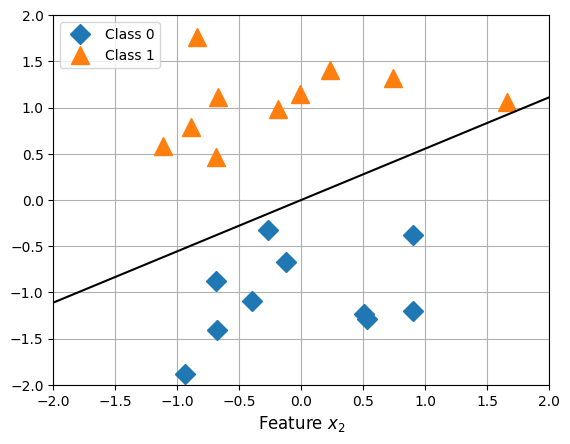

In [47]:
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    features[targets == 0, 0],
    features[targets == 0, 1],
    marker="D",
    markersize=10,
    linestyle='',
    label = "Class 0",
)
plt.plot(
    features[targets == 1, 0],
    features[targets == 1, 1],
    marker="^",
    markersize=13,
    linestyle='',
    label = "Class 1",
)

# Plot the decsion boundary
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel("Feature $x_1$", fontsize=12)
plt.xlabel("Feature $x_2$", fontsize=12)
plt.grid()
plt.show()

### Conclusion

And there it is! The black line is the decision boundary learned by our Perceptron. Everything on one side of the line will be predicted as Class 0, and everything on the other side will be predicted as Class 1.

This demonstrates how a simple Perceptron model can learn a linear classifier from data. While limited to linearly separable problems, the Perceptron formed the foundation for all the more complex neural networks that are used today.